<a href="https://colab.research.google.com/github/brahmaramesh/ramesh/blob/master/qiskit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit[visualization]

In [ ]:
!pip install qiskit-ibm-runtime

In [ ]:
token = "51ae3f5a7050b16a74875faf084816419506323b4db0f64bebe5584af168c826e113b6b2b1b89c0b96cf58952b86d4cfd3d7bb528273087b6a319f734fc90646"

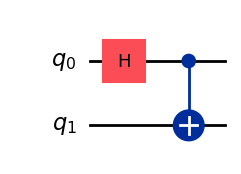

In [ ]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ, ZI, IZ, XX, XI, IX]

In [ ]:
# Use the following code instead if you want to run on a simulator:

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

# service = QiskitRuntimeService(channel="ibm_quantum", token=os.environ['IBM_API_KEY'])
# backend = service.least_busy(simulator=False, operational=True)
backend = FakeAlmadenV2()
print(backend)

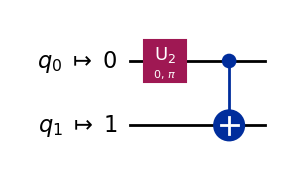

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(backend)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])

# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).

job_result = job.result()

# This is the result from our single pub, which had five observables,
# so contains information on all five.

pub_result = job.result()[0]

/usr/local/lib/python3.11/dist-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [ ]:
pub_result

PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'target_precision': 0.015625, 'shots': 4096, 'circuit_metadata': {}})

In [ ]:
pub_result.data.evs

array([ 1.        ,  0.00830078,  0.00830078,  1.        , -0.0078125 ,
       -0.0078125 ])

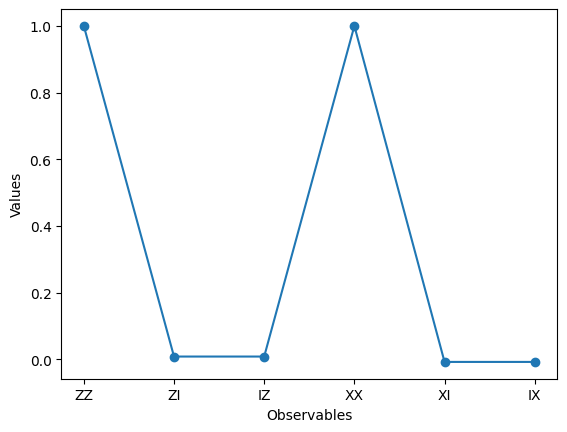

In [ ]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
observables_labels = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()